In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from BaseModel import BinaryClassifier
from ConfigModel import *
import seaborn as sns
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns


DEVICE: cuda


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]          11,008
              ReLU-2                   [-1, 64]               0
         Dropout1d-3                   [-1, 64]               0
            Linear-4                    [-1, 2]             130
Total params: 11,138
Trainable params: 11,138
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [7]:

data = pd.read_csv("Performance.csv")
loss_train = data['Loss Train']
loss_test = data['Loss Test']
f1_train = data['F1 Train']
f1_test = data['F1 Test']
data.head()

,Loss Train,Loss Test,F1 Train,F1 Test
0,0.876998,0.757203,0.486610,0.370376
1,0.759060,0.749793,0.532688,0.396939
2,0.758862,0.692525,0.517136,0.561480
3,0.723990,0.690798,0.517348,0.565253
4,0.705095,0.689128,0.611307,0.579167


# LOSS AND F1-SCORE OVER EPOCHS #

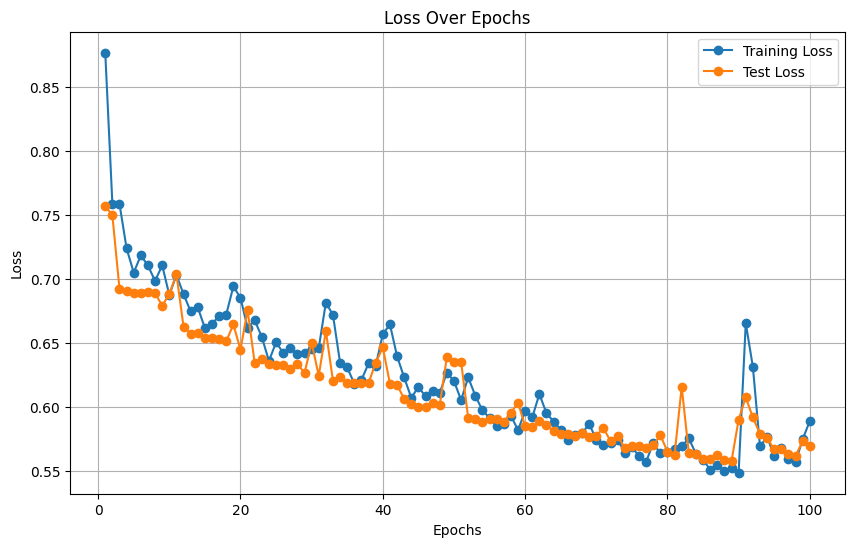

In [8]:

df = pd.read_csv("Performance.csv")
# Number of epochs
num_epochs = len(loss_train)

# Create a list of epoch numbers
epochs = list(range(1, num_epochs + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_train, label='Training Loss', marker='o')
plt.plot(epochs, loss_test, label='Test Loss', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


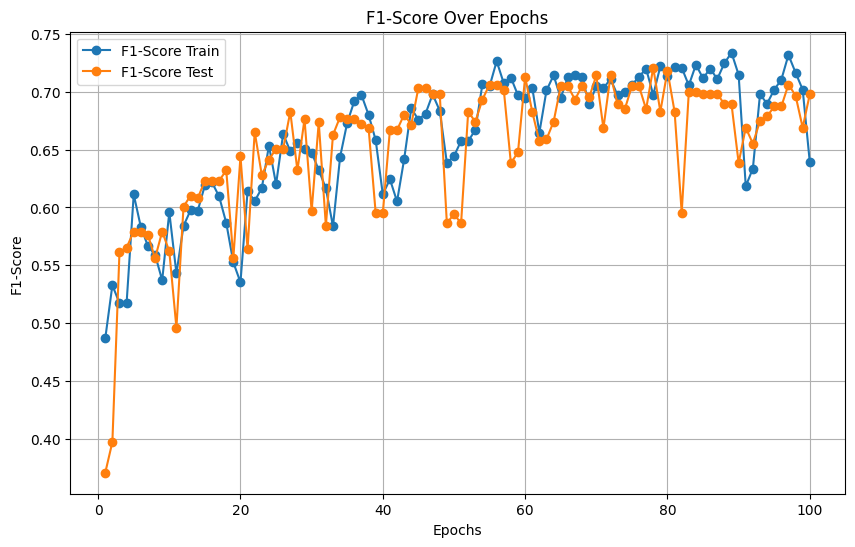

In [9]:
num_epochs = len(loss_train)

# Create a list of epoch numbers
epochs = list(range(1, num_epochs + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, f1_train, label='F1-Score Train', marker='o')
plt.plot(epochs, f1_test, label='F1-Score Test', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.title('F1-Score Over Epochs')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# CONFUSION MATRIX

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]


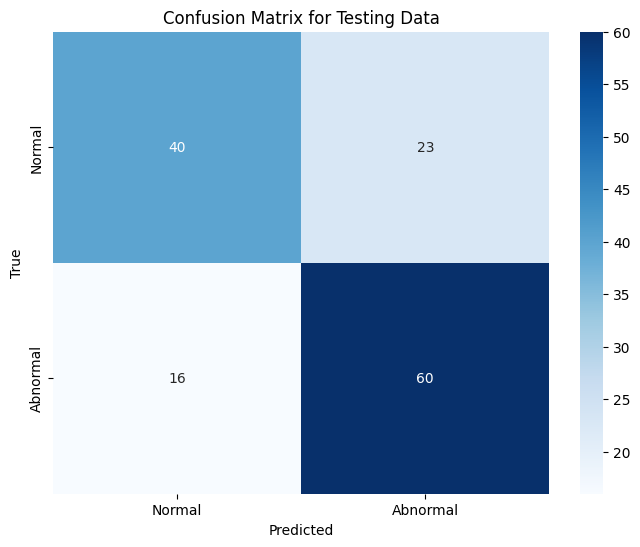

In [3]:
model = BinaryClassifier().to(DEVICE)
# Load the saved model
loaded_model = torch.load('model\weight')

# Set the model to evaluation mode
loaded_model.eval()

# Create lists to store true and predicted labels
true_labels_test = []
predicted_labels_test = []

# Evaluate the test data using the loaded model
with torch.no_grad():
    for inputs, labels in TESTLOADER:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE).long()
        outputs = loaded_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels_test.extend(labels.tolist())
        predicted_labels_test.extend(predicted.tolist())

# Calculate the confusion matrix
print(true_labels_test)
print(predicted_labels_test)
confusion_matrix_test = confusion_matrix(true_labels_test, predicted_labels_test)

# Define class labels if available
class_labels = ["Normal", "Abnormal"]  # Replace with your actual class labels

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Testing Data")
plt.show()

# Checking Gradient

<Figure size 1200x600 with 0 Axes>

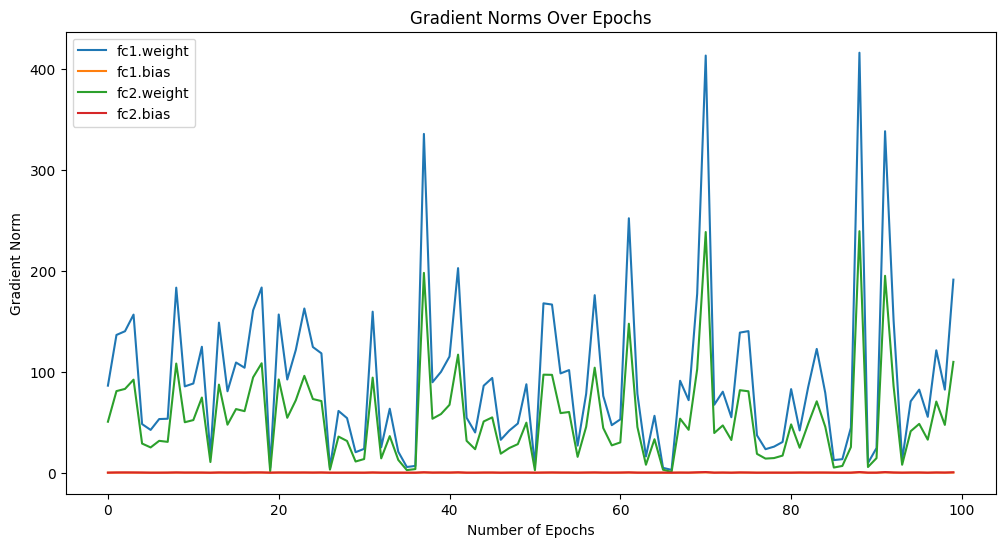

In [11]:
plt.figure(figsize=(12, 6))
data = pd.read_csv('EpochGradientNorms.csv')

# Plot the data
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

plt.xlabel('Number of Epochs')
plt.ylabel('Gradient Norm')
plt.legend(loc ='upper left')
plt.title('Gradient Norms Over Epochs')
plt.show()
